<a href="https://colab.research.google.com/github/krishnaanshgoel/CHSW-project/blob/main/Offline_LMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computer Hardware and Software Project**
Roll Number:
1. 2022UCS1512
2. 2022UCS1530
3. 2022UCS1582

## About the project
Topic: Personalized E-Learning Platform
### Objective:
Create a platform that tracks students progress in to improve their final results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
path_prefix = '/content'

studInfo=pd.read_csv(os.path.join(path_prefix, "studentInfo.csv"))
assessments=pd.read_csv(os.path.join(path_prefix, "assessments.csv"))
studAss=pd.read_csv(os.path.join(path_prefix, "studentAssessment.csv"))
studVle=pd.read_csv(os.path.join(path_prefix, "studentVle.csv"))
vle=pd.read_csv(os.path.join(path_prefix, "vle.csv"))


In [ ]:
exams=assessments[assessments["assessment_type"]=="Exam"]
others=assessments[assessments["assessment_type"]!="Exam"]
amounts=others.groupby(["code_module","code_presentation"]).count()["id_assessment"]
amounts=amounts.reset_index()
amounts.head()


,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11


In [ ]:
def pass_fail(grade):
    if grade>=40:
        return True
    else:
        return False
stud_ass=pd.merge(studAss,others,how="inner",on=["id_assessment"])
stud_ass["pass"]=stud_ass["score"].apply(pass_fail)
stud_ass["weighted_grade"]=stud_ass["score"]*stud_ass["weight"]/100

In [ ]:
avg_grade=stud_ass.groupby(["id_student","code_module","code_presentation"]).sum()["weighted_grade"].reset_index()
avg_grade.head()

,id_student,code_module,code_presentation,weighted_grade
0,6516,AAA,2014J,63.50
1,8462,DDD,2013J,34.90
2,8462,DDD,2014J,43.00
3,11391,AAA,2013J,82.40
4,23629,BBB,2013B,16.69


In [ ]:
pass_rate=pd.merge((stud_ass[stud_ass["pass"]==True].groupby(["id_student","code_module","code_presentation"]).count()["pass"]).reset_index(),amounts,how="left",on=["code_module","code_presentation"])
pass_rate["pass_rate"]=pass_rate["pass"]/pass_rate["id_assessment"]
pass_rate.drop(["pass","id_assessment"], axis=1,inplace=True)
pass_rate.head()

,id_student,code_module,code_presentation,pass_rate
0,6516,AAA,2014J,1.000000
1,8462,DDD,2013J,0.500000
2,8462,DDD,2014J,0.666667
3,11391,AAA,2013J,1.000000
4,23629,BBB,2013B,0.363636


In [ ]:
stud_exams=pd.merge(studAss,exams,how="inner",on=["id_assessment"])
stud_exams["exam_score"]=stud_exams["score"]
stud_exams.drop(["id_assessment","date_submitted","is_banked", "score","assessment_type","date","weight"],axis=1,inplace=True)
stud_exams.head()

,id_student,code_module,code_presentation,exam_score
0,558914,CCC,2014B,32.0
1,559706,CCC,2014B,78.0
2,559770,CCC,2014B,54.0
3,560114,CCC,2014B,64.0
4,560311,CCC,2014B,100.0


In [ ]:
vle.dropna()
avg_per_site=studVle.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [ ]:
avg_per_student=avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
avg_per_student.head()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


In [ ]:
studInfo=studInfo[studInfo["final_result"]!="Withdrawn"]
studInfo=studInfo[["code_module","code_presentation","id_student","num_of_prev_attempts","final_result"]]
studInfo.head()

,code_module,code_presentation,id_student,num_of_prev_attempts,final_result
0,AAA,2013J,11391,0,Pass
1,AAA,2013J,28400,0,Pass
3,AAA,2013J,31604,0,Pass
4,AAA,2013J,32885,0,Pass
5,AAA,2013J,38053,0,Pass


In [ ]:
df_1=pd.merge(avg_grade,pass_rate,how="inner",on=["id_student","code_module","code_presentation"])
assessment_info=pd.merge(df_1, stud_exams, how="inner", on=["id_student","code_module","code_presentation"])
assessment_info.head()

,id_student,code_module,code_presentation,weighted_grade,pass_rate,exam_score
0,23698,CCC,2014J,69.97,1.000000,80.0
1,24213,DDD,2014B,78.40,1.000000,58.0
2,27116,CCC,2014J,92.02,1.000000,96.0
3,28046,DDD,2013J,49.90,0.833333,40.0
4,28787,CCC,2014J,11.98,0.375000,44.0


In [ ]:
df_2=pd.merge(studInfo,assessment_info,how="inner",on=["id_student","code_module","code_presentation"])
final_df=pd.merge(df_2,avg_per_student,how="inner", on=["id_student","code_module","code_presentation"])
final_df.drop(["id_student","code_module","code_presentation"],axis=1,inplace=True)
final_df.head()

,num_of_prev_attempts,final_result,weighted_grade,pass_rate,exam_score,date,sum_click
0,0,Distinction,89.65,1.000,94.0,103.457907,2.706754
1,0,Pass,84.58,1.000,76.0,87.617265,1.539047
2,0,Pass,51.44,0.625,66.0,49.181286,1.562619
3,0,Pass,75.13,1.000,50.0,118.698642,2.189217
4,0,Distinction,93.22,1.000,98.0,75.791987,2.100617


In [ ]:
print(final_df.describe())
print("==================")
print(final_df.info())

       num_of_prev_attempts  weighted_grade    pass_rate   exam_score  \
count           4950.000000     4950.000000  4950.000000  4950.000000   
mean               0.118586       66.280909     0.868616    65.604444   
std                0.395313       21.221975     0.182934    20.564815   
min                0.000000        1.120000     0.125000     0.000000   
25%                0.000000       51.512500     0.769231    51.000000   
50%                0.000000       69.760000     1.000000    67.000000   
75%                0.000000       83.622500     1.000000    82.000000   
max                5.000000      100.000000     1.000000   100.000000   

              date    sum_click  
count  4950.000000  4950.000000  
mean    101.047138     2.016114  
std      24.917830     0.722249  
min      17.566546     1.000000  
25%      84.681549     1.545160  
50%      99.934672     1.802246  
75%     116.635412     2.279943  
max     237.035714    13.134308  
<class 'pandas.core.frame.DataFrame'

<ipython-input-67-575db79f63da>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="final_result", ax=axes[1], palette="viridis")


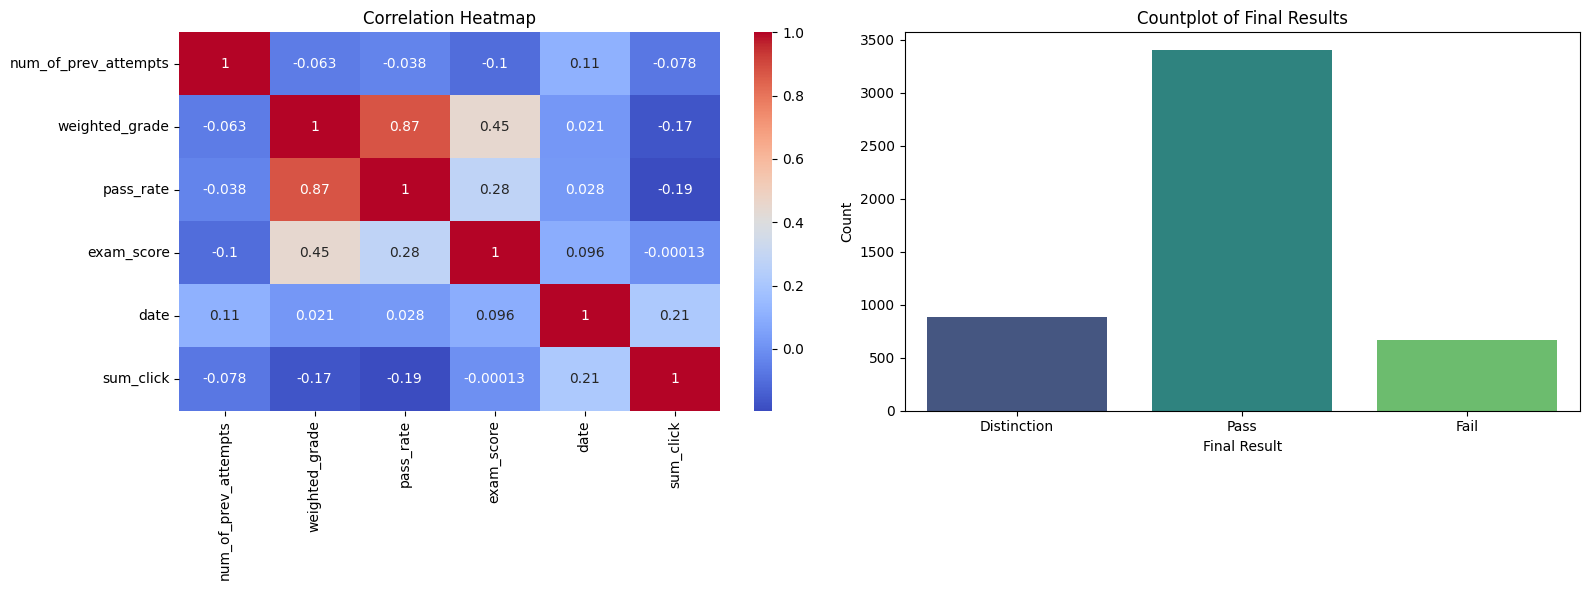

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation heatmap
numeric_cols = final_df.select_dtypes(include=["number"])

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Subplot 1: Heatmap of correlations (numeric columns only)
sns.heatmap(numeric_cols.corr(), annot=True, ax=axes[0], cmap="coolwarm")
axes[0].set_title("Correlation Heatmap")

# Subplot 2: Countplot of 'final_result'
sns.countplot(data=final_df, x="final_result", ax=axes[1], palette="viridis")
axes[1].set_title("Countplot of Final Results")
axes[1].set_xlabel("Final Result")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
final_df=final_df[final_df["sum_click"]<=10]
final_df=final_df[final_df["num_of_prev_attempts"]<=4]
final_df.head()

,num_of_prev_attempts,final_result,weighted_grade,pass_rate,exam_score,date,sum_click
0,0,Distinction,89.65,1.000,94.0,103.457907,2.706754
1,0,Pass,84.58,1.000,76.0,87.617265,1.539047
2,0,Pass,51.44,0.625,66.0,49.181286,1.562619
3,0,Pass,75.13,1.000,50.0,118.698642,2.189217
4,0,Distinction,93.22,1.000,98.0,75.791987,2.100617


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X=final_df.drop("final_result", axis=1)
y=final_df["final_result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X1_test=X_test
X1_train=X_train
X2_test=X_test.drop("weighted_grade",axis=1)
X2_train=X_train.drop("weighted_grade",axis=1)
X3_test=X_test.drop("pass_rate",axis=1)
X3_train=X_train.drop("pass_rate",axis=1)

In [ ]:
scaler=MinMaxScaler()
X1_train=scaler.fit_transform(X1_train)
X1_test=scaler.transform(X1_test)

In [ ]:
model=Sequential()

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def categories(cat):
    if cat=="Fail":
        return 0
    if cat=="Pass":
        return 1
    if cat=="Distinction":
        return 1

y_test=list(map(categories,y_test))
y_train=list(map(categories,y_train))

In [ ]:
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
early_stop=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X1_test,y_test),callbacks=[early_stop])

Epoch 1/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0464 - val_loss: 0.6502
Epoch 2/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0959 - val_loss: 0.6343
Epoch 3/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6325 - val_loss: 0.6217
Epoch 4/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4147 - val_loss: 0.6078
Epoch 5/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3894 - val_loss: 0.5891
Epoch 6/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3756 - val_loss: 0.5725
Epoch 7/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3850 - val_loss: 0.5569
Epoch 8/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3540 - val_loss: 0.5427
Epoch 9/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3609 - val_loss: 0.5305
Epoch 10/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3379 - val_loss: 0.5200
Epoch 11/2000
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3661 - val_loss: 0.5095
Epoch 12/2000
109/109 ━━━━━━━━

In [ ]:
history = model.history

In [ ]:
history.history

{'loss': [1.6197394132614136,
  0.9921379089355469,
  0.588353157043457,
  0.41447311639785767,
  0.3807065784931183,
  0.3703293800354004,
  0.36604270339012146,
  0.35581573843955994,
  0.354118674993515,
  0.343435674905777,
  0.33938151597976685,
  0.34285715222358704,
  0.3416009247303009,
  0.32914572954177856,
  0.3281712234020233,
  0.31816747784614563,
  0.32011887431144714,
  0.3154520094394684,
  0.3101705014705658,
  0.3085632920265198,
  0.3079724609851837,
  0.3086574375629425,
  0.30083170533180237,
  0.30770358443260193,
  0.307455837726593,
  0.2919059097766876,
  0.29713916778564453,
  0.29687461256980896,
  0.2929413318634033,
  0.29024484753608704,
  0.29579269886016846,
  0.2901122272014618,
  0.2994435429573059,
  0.29103872179985046,
  0.291137158870697,
  0.2935967445373535,
  0.29937392473220825,
  0.29411008954048157,
  0.2917799949645996,
  0.2879873216152191,
  0.29753127694129944,
  0.2869310677051544,
  0.29193946719169617,
  0.2908400893211365,
  0.294708

<Axes: >

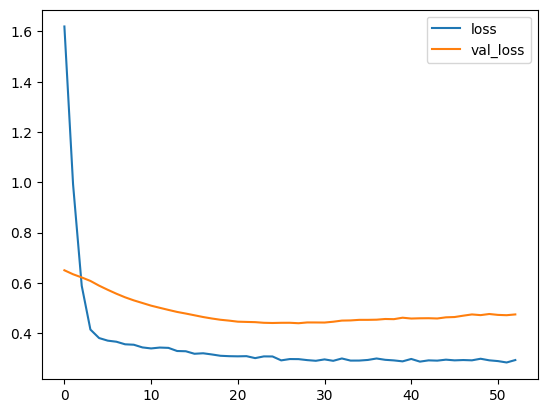

In [ ]:
loss = pd.DataFrame(history.history)
loss.plot()


In [ ]:

predictions=model.predict(X_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


array([[0.9948393 ],
       [0.95676154],
       [0.8929296 ],
       ...,
       [0.98468226],
       [0.99335384],
       [0.93045205]], dtype=float32)

In [ ]:
def pred(prob):
    if prob>0.5:
        return 1
    else:
        return 0

result = list(map(pred,predictions))
result

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))

[[  33  156]
 [   2 1294]]
              precision    recall  f1-score   support

           0       0.94      0.17      0.29       189
           1       0.89      1.00      0.94      1296

    accuracy                           0.89      1485
   macro avg       0.92      0.59      0.62      1485
weighted avg       0.90      0.89      0.86      1485



In [ ]:
model.save('result_prediction.keras')

In [ ]:
from tensorflow.keras import models
new_model = models.load_model('result_prediction.keras')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203 (816.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136 (548.00 B)

In [ ]:
TFLITE_MODEL_FILENAME = 'result_prediction.tflite'

import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp_nj0cv6s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138917196603152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138917196604112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138917196602768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138917196605264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138917196604304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138917196606224: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
open(TFLITE_MODEL_FILENAME, 'wb').write(tflite_model)

2320

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TFLITE_MODEL_FILENAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [1 6]
Input Type: <class 'numpy.float32'>
Output Shape: [1 1]
Output Type: <class 'numpy.float32'>


In [ ]:
print(model.inputs)
print("===================================================")
print(new_model.inputs)

[<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor>]
[<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=input_layer>]


In [ ]:
helper = interpreter


helper.allocate_tensors()

# Input/output details
input_index = input_details[0]['index']
output_index = output_details[0]['index']

# Test a sample
test_sample = np.expand_dims(X_test.iloc[0].values, axis=0).astype(np.float32)
helper.set_tensor(input_index, test_sample)
helper.invoke()
tflite_output = helper.get_tensor(output_index)
print("TFLite Output:", tflite_output)

TFLite Output: [[0.9948393]]


In [ ]:
y_test[0]

1

In [ ]:

helper.allocate_tensors()

input_details = helper.get_input_details()
output_details = helper.get_output_details()

X_test_np = X_test.values.astype(np.float32)
lite_predictions = []

for sample in X_test_np:
    sample = np.expand_dims(sample, axis=0)

    helper.set_tensor(input_details[0]['index'], sample)

    helper.invoke()

    output = helper.get_tensor(output_details[0]['index'])
    lite_predictions.append(output[0][0])

lite_result = list(map(pred, lite_predictions))


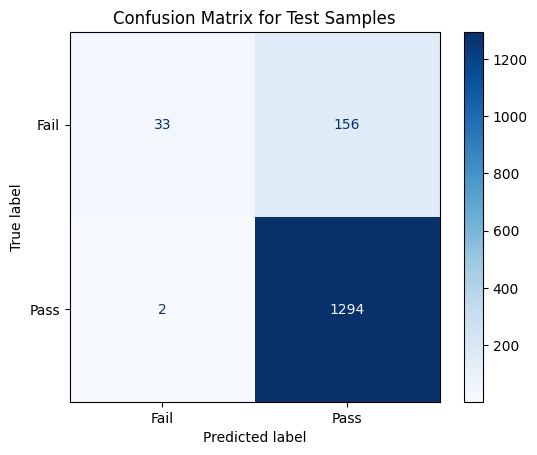

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lite_result)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Samples")
plt.show()


In [ ]:
print(classification_report(y_test,lite_result)

'              precision    recall  f1-score   support\n\n           0       0.94      0.17      0.29       189\n           1       0.89      1.00      0.94      1296\n\n    accuracy                           0.89      1485\n   macro avg       0.92      0.59      0.62      1485\nweighted avg       0.90      0.89      0.86      1485\n'